In [28]:
%load_ext autoreload
%autoreload 2
import main
from main import *
import multiprocessing
import concurrent.futures
import matplotlib.image as mpimg
import stat_funcs

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


False


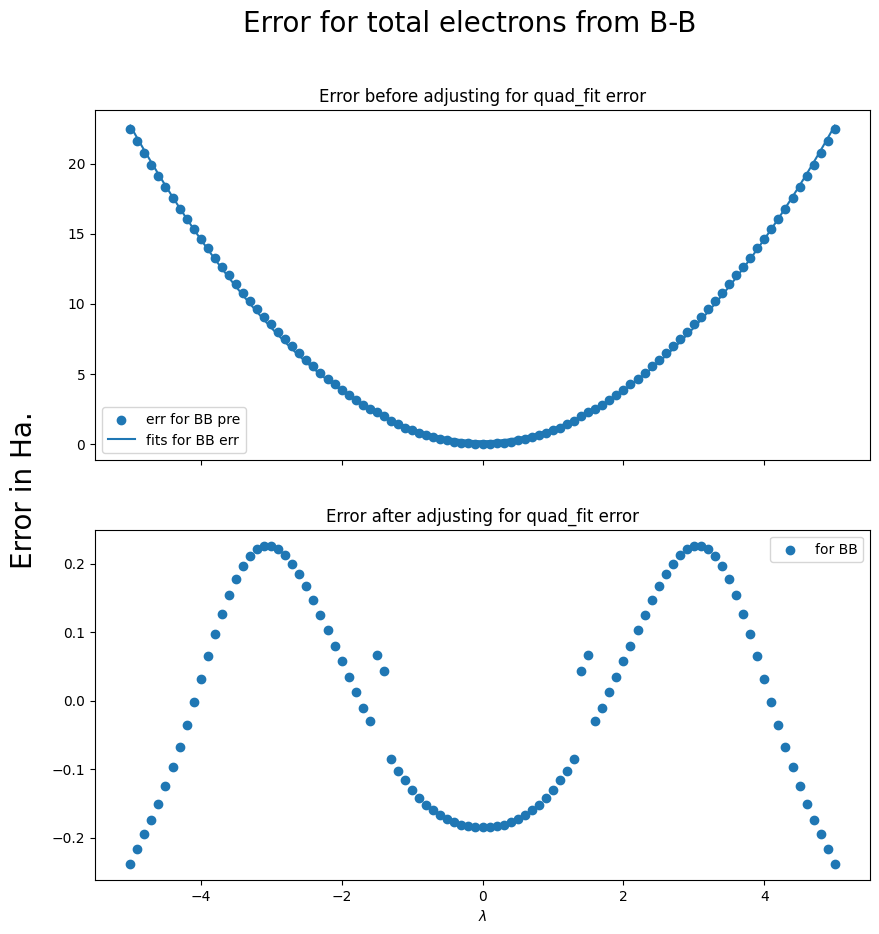

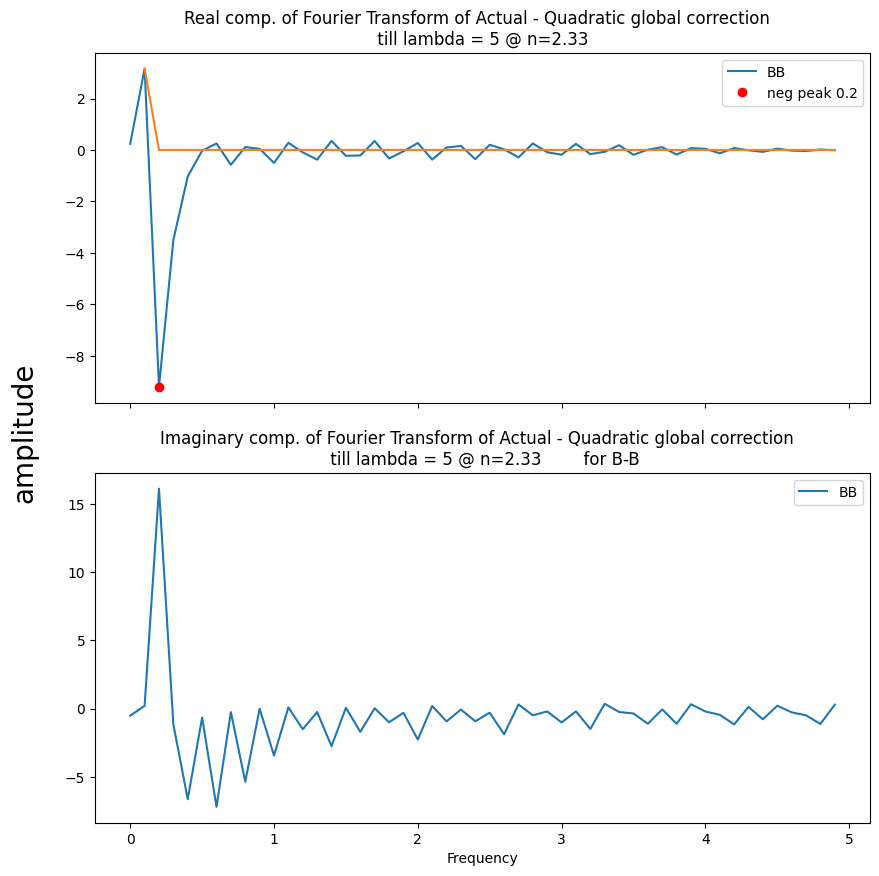

All good
3.1618507841325885
False


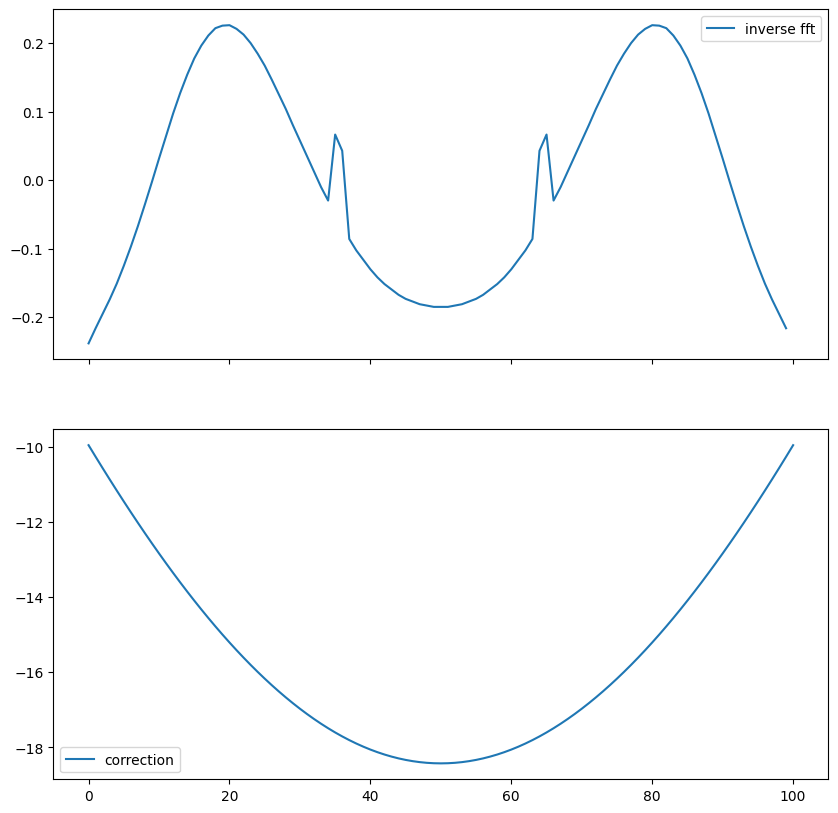

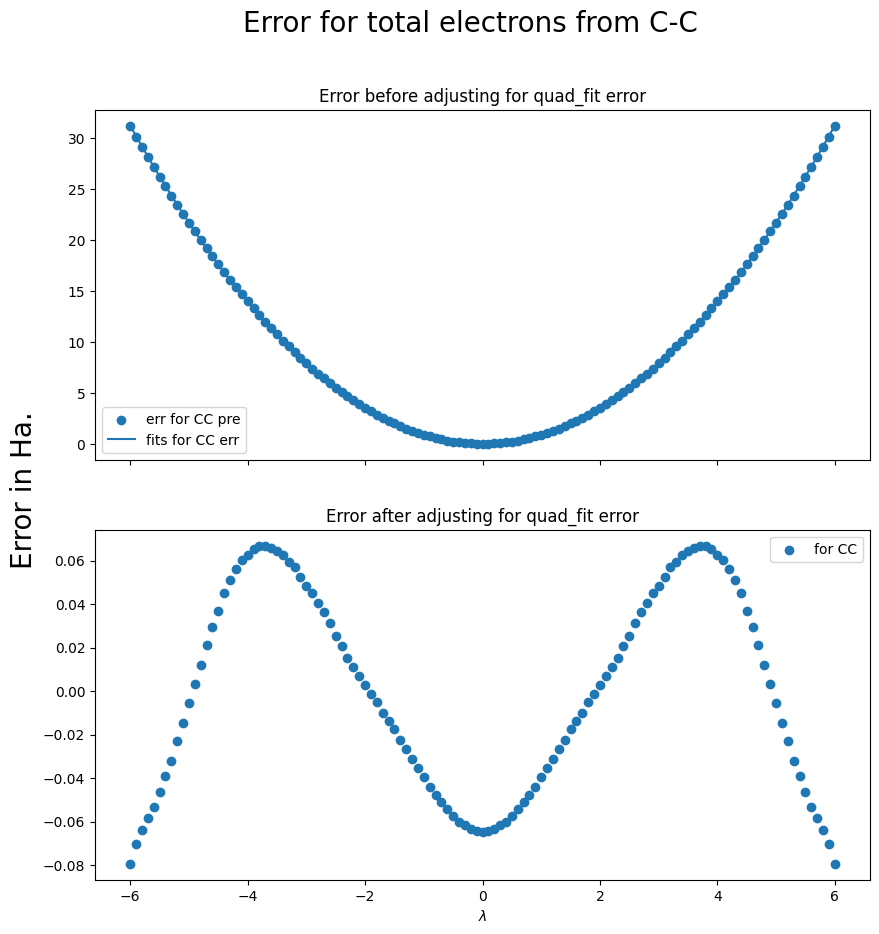

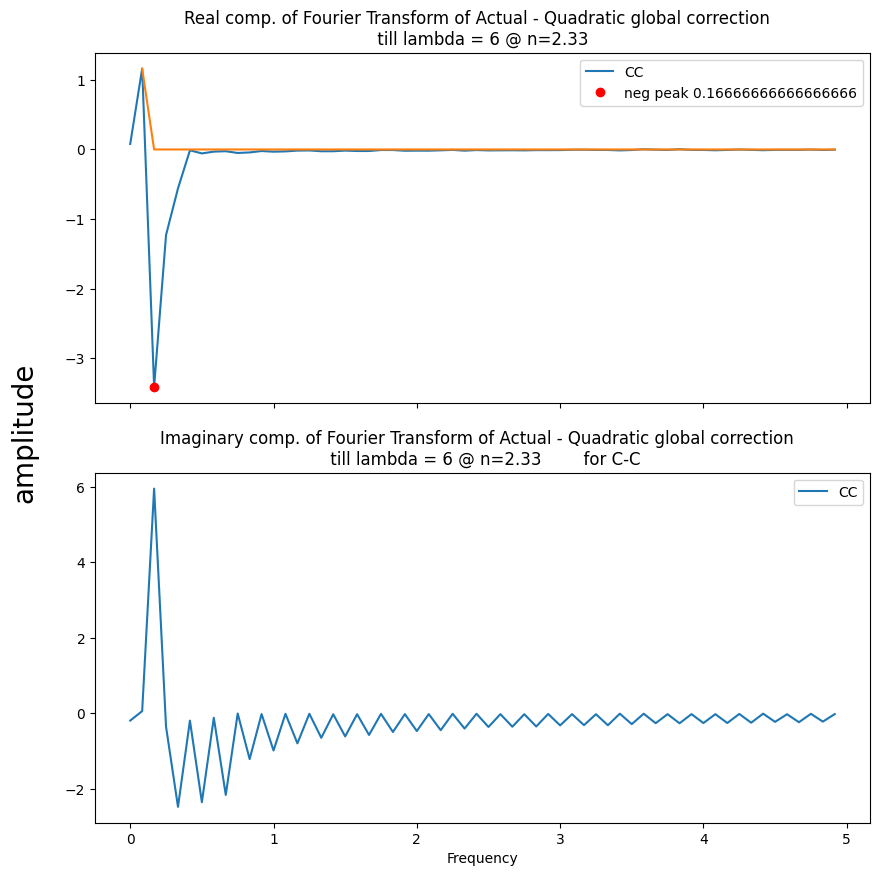

All good
1.1601155712585938
False


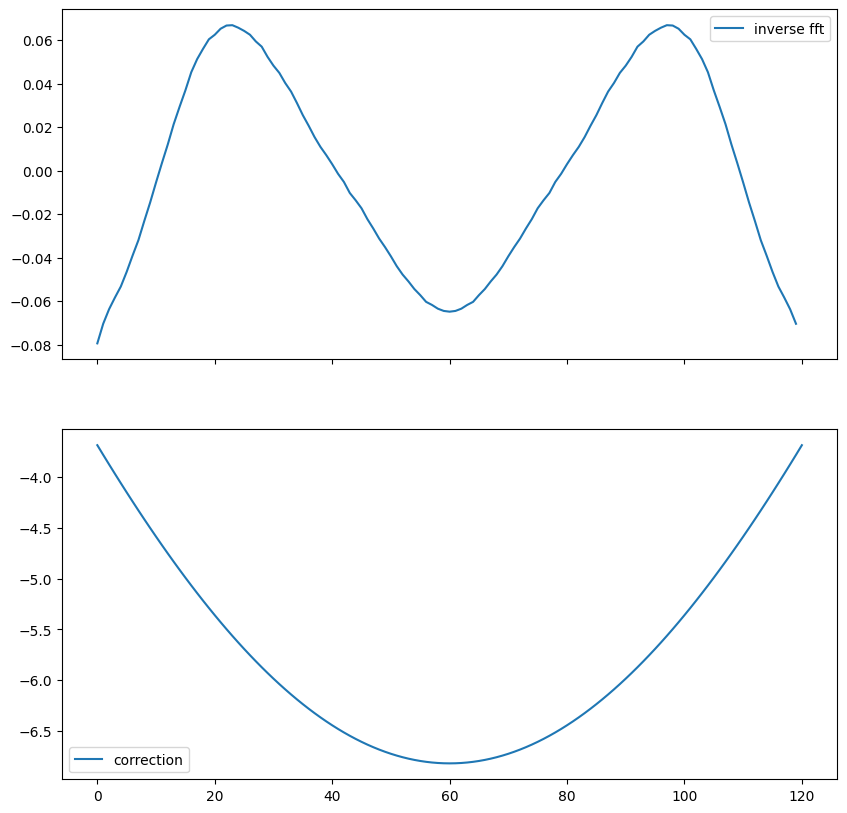

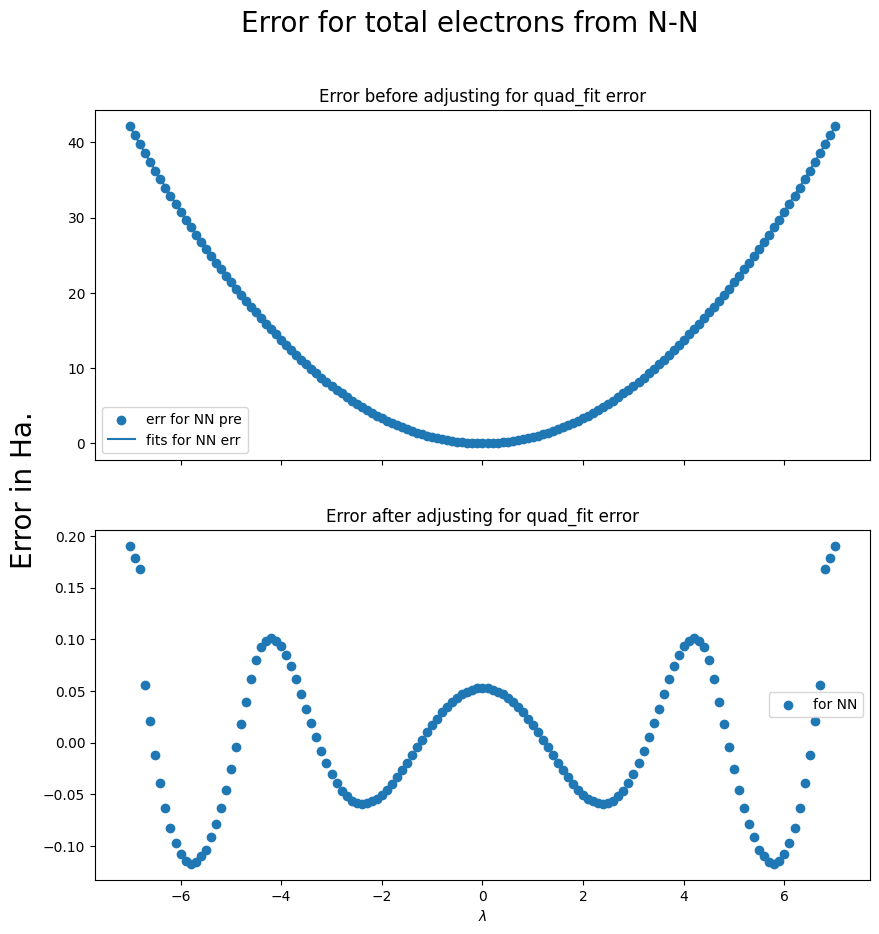

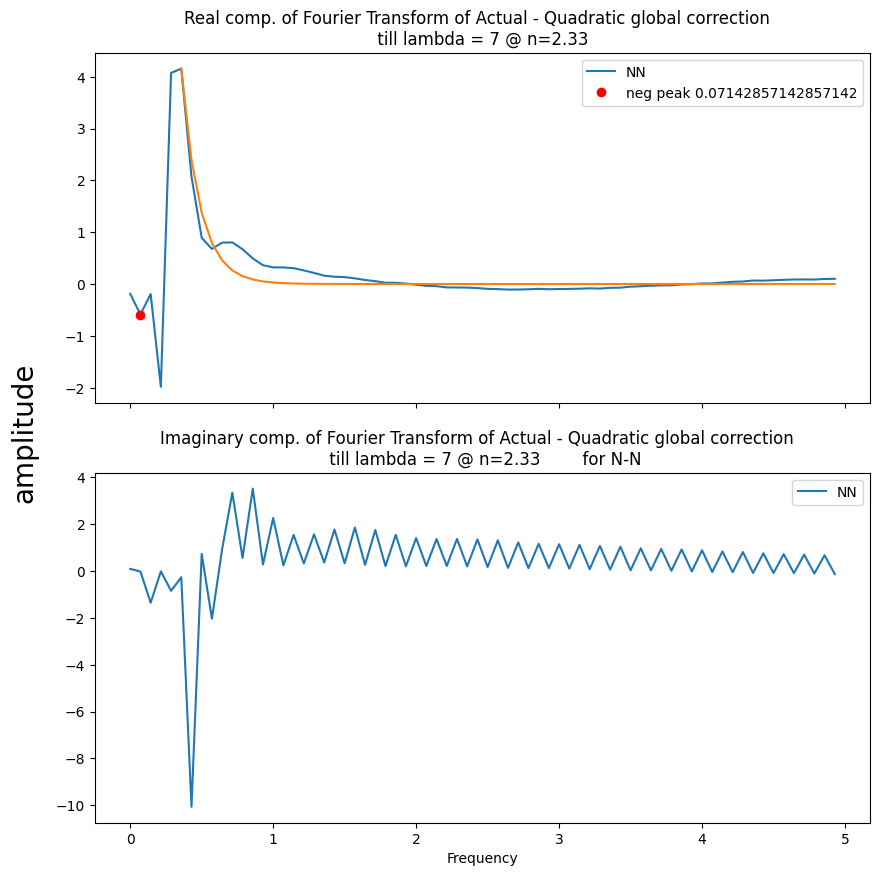

All good
4.1557598513864225
False


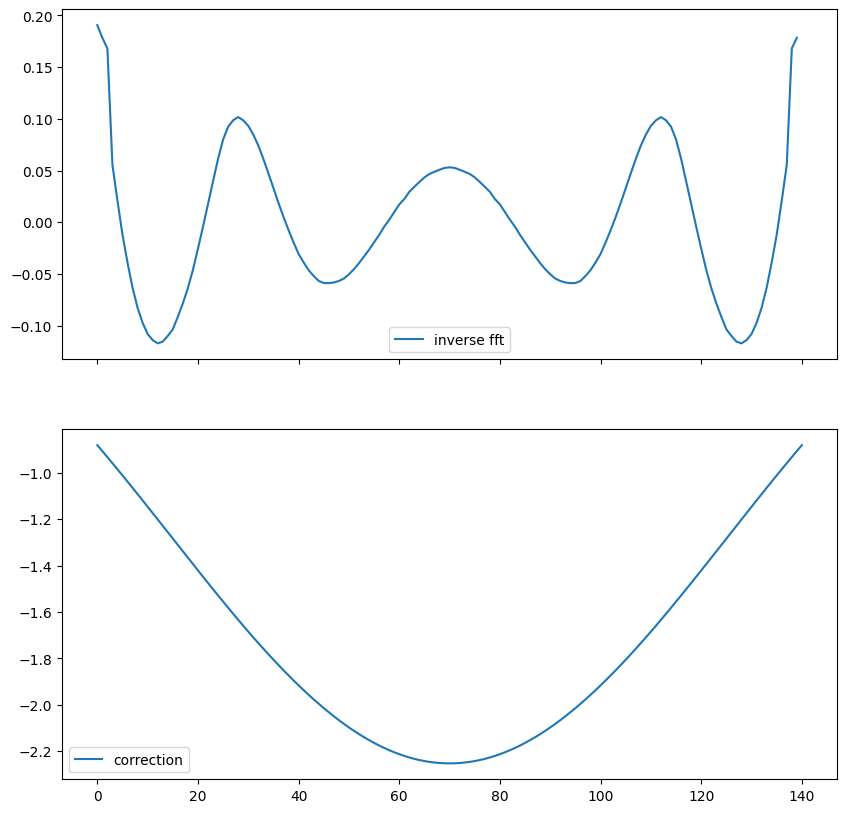

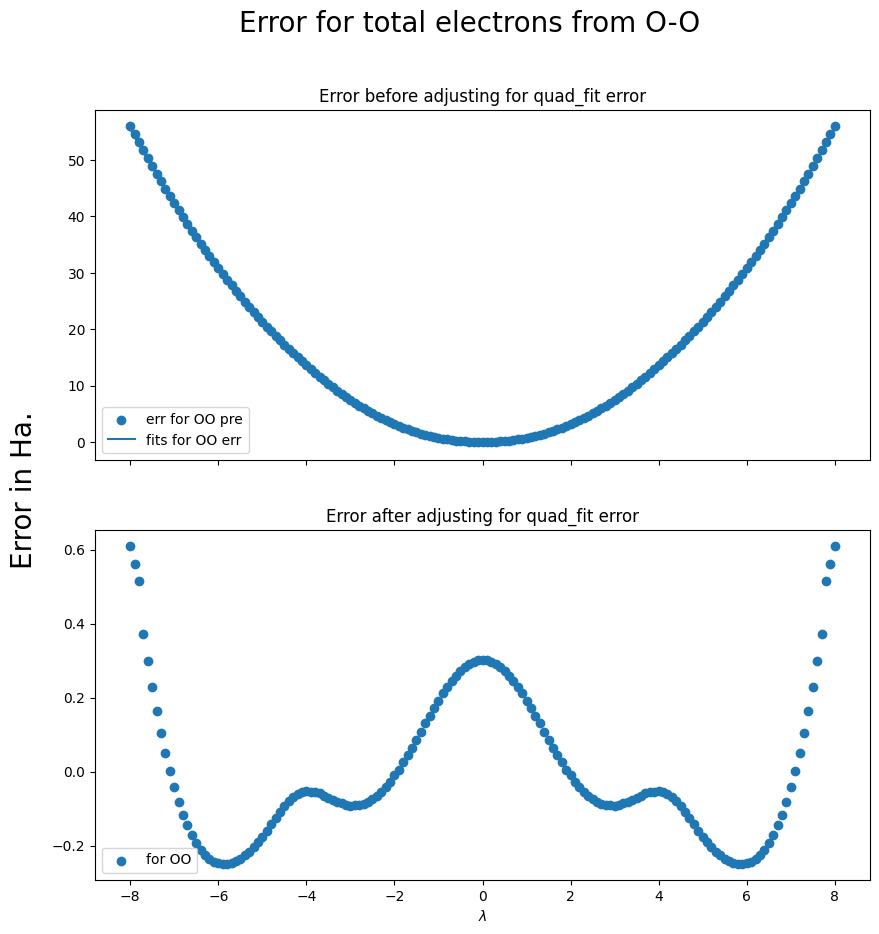

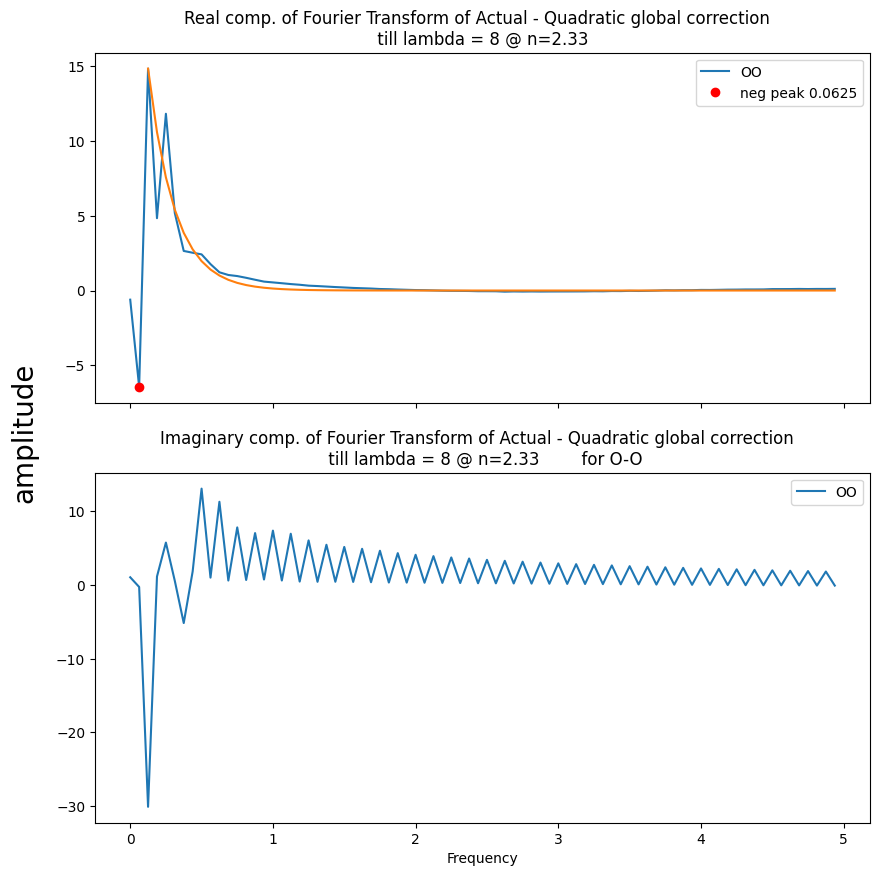

All good
14.813775543655492
False


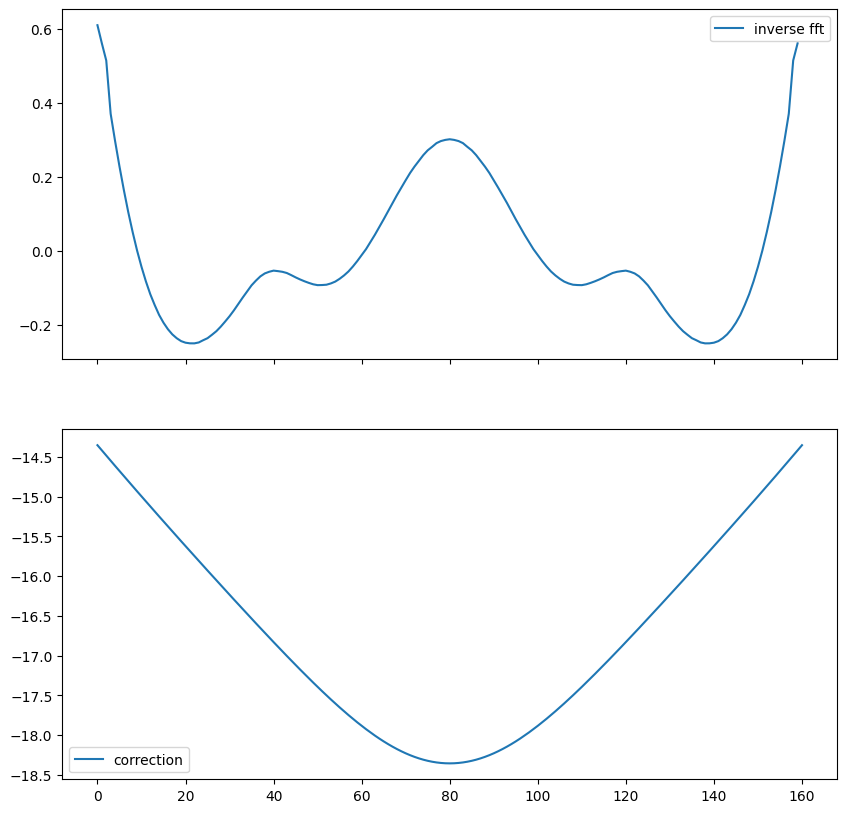

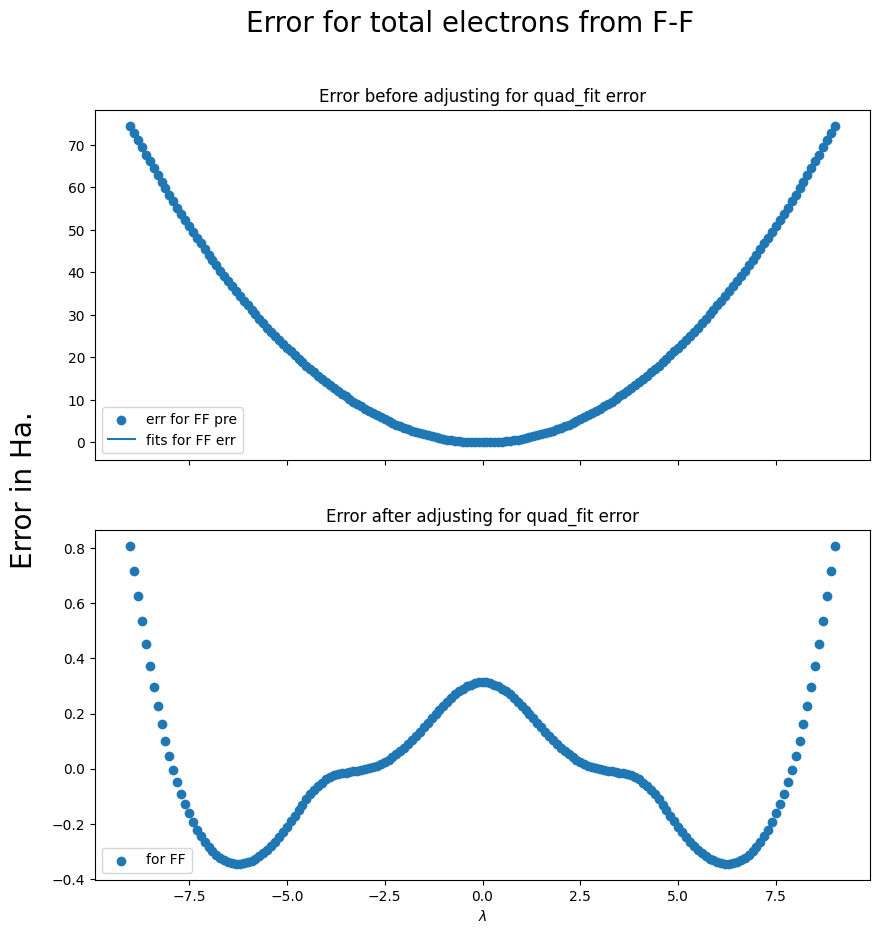

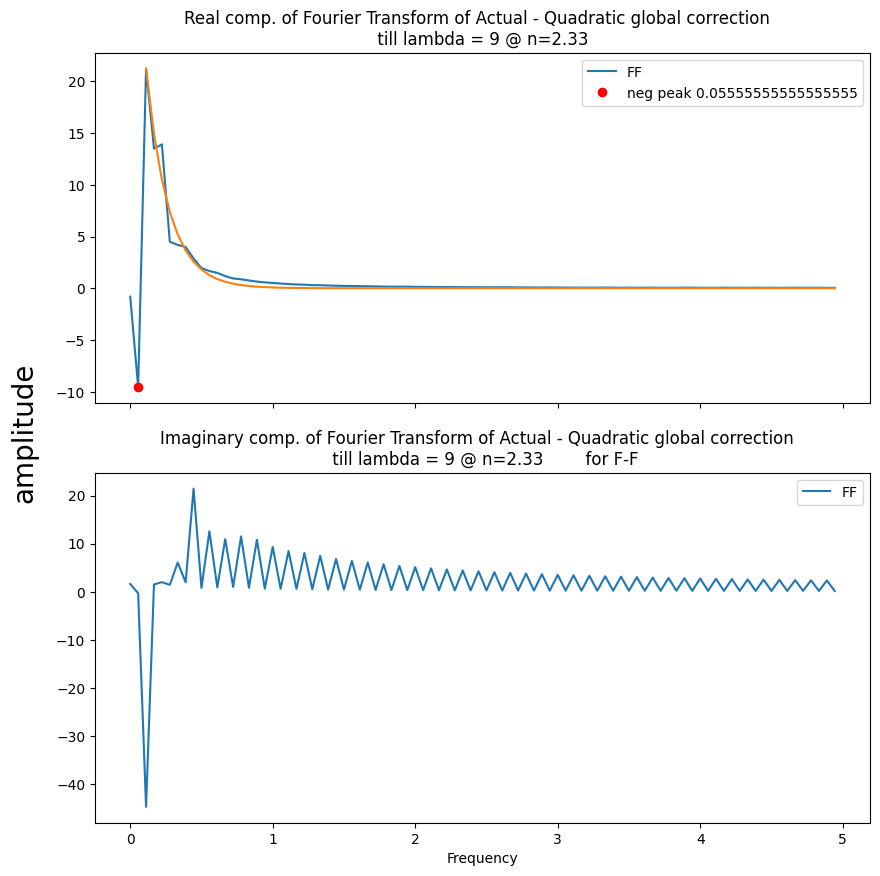

All good
21.223756609345475
True


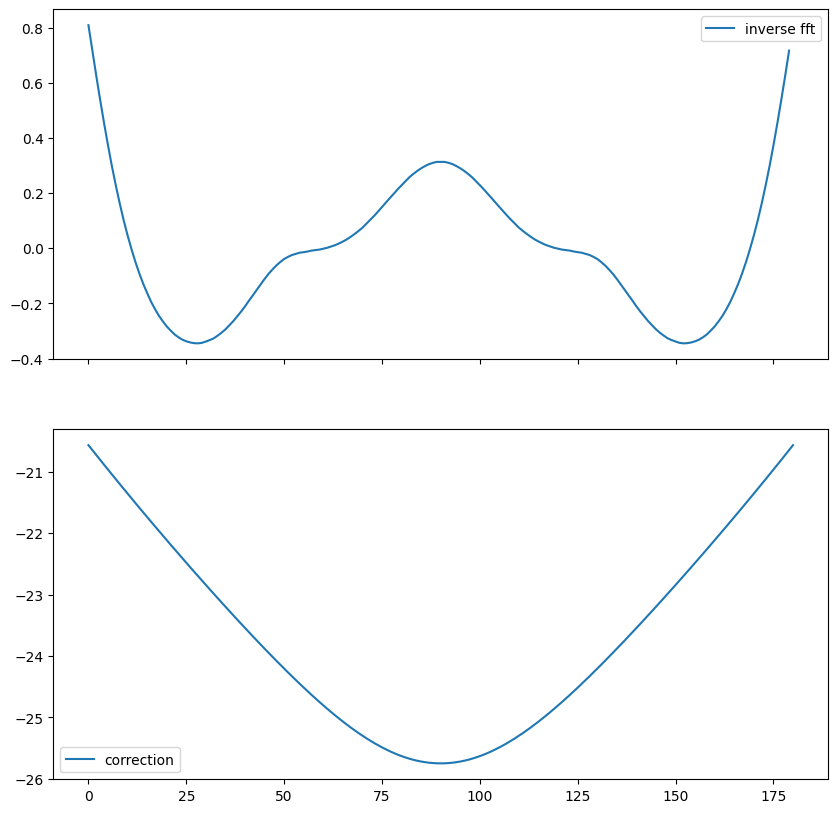

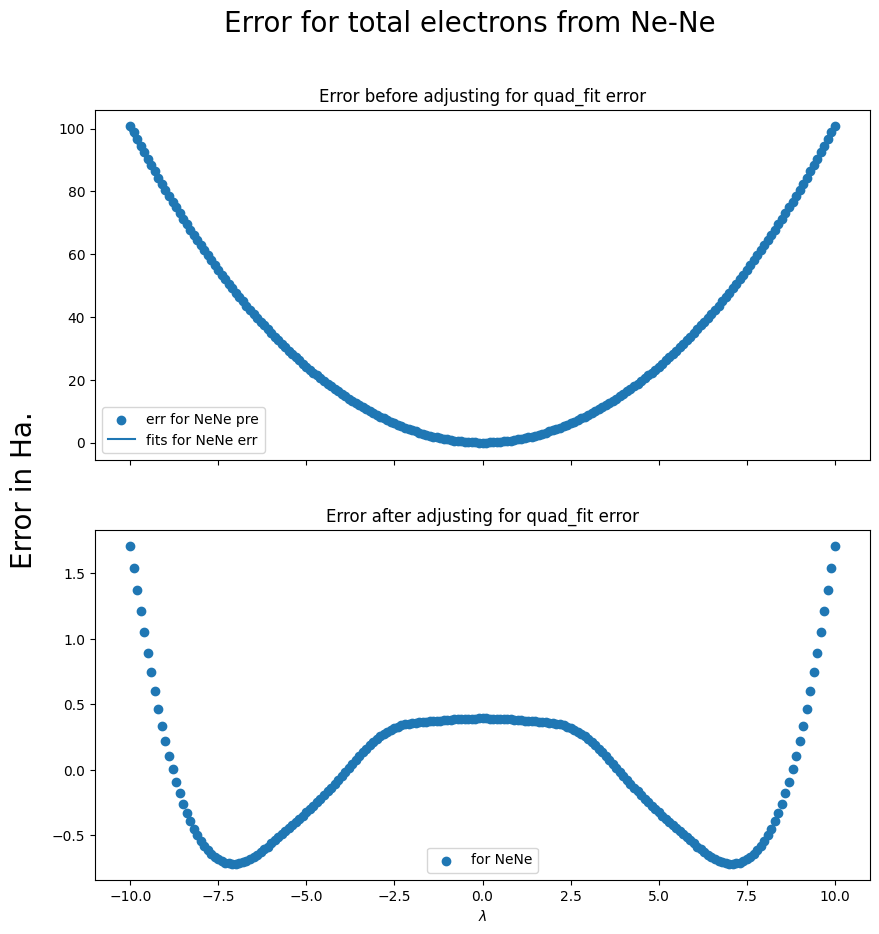

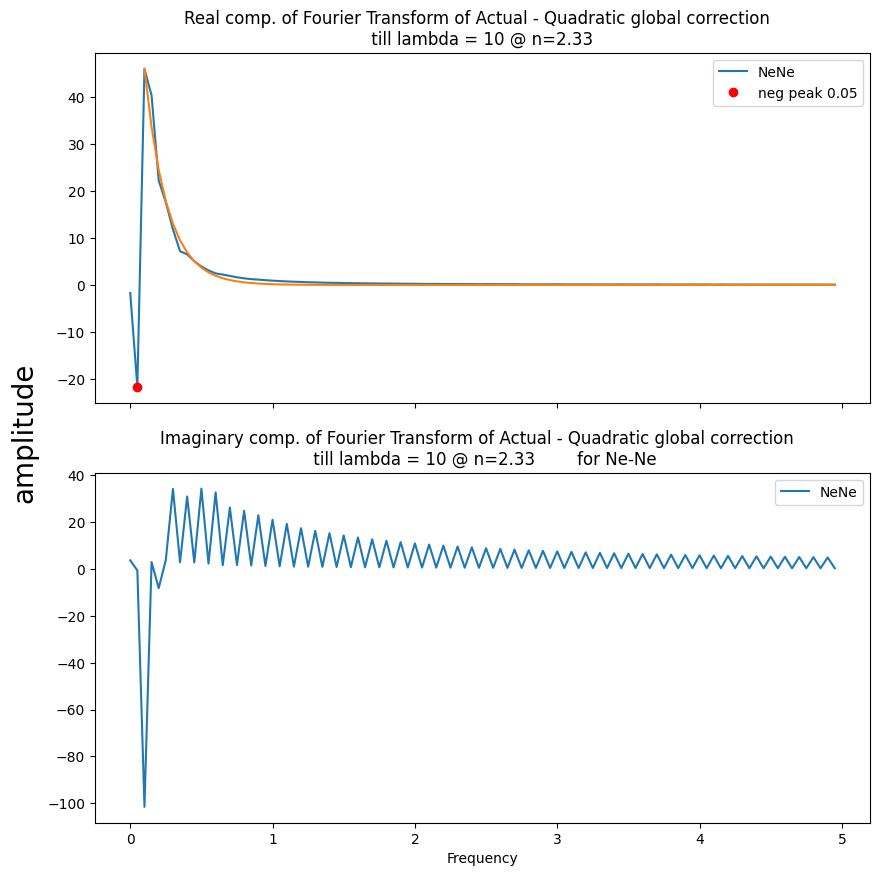

All good
45.99717079489715
False


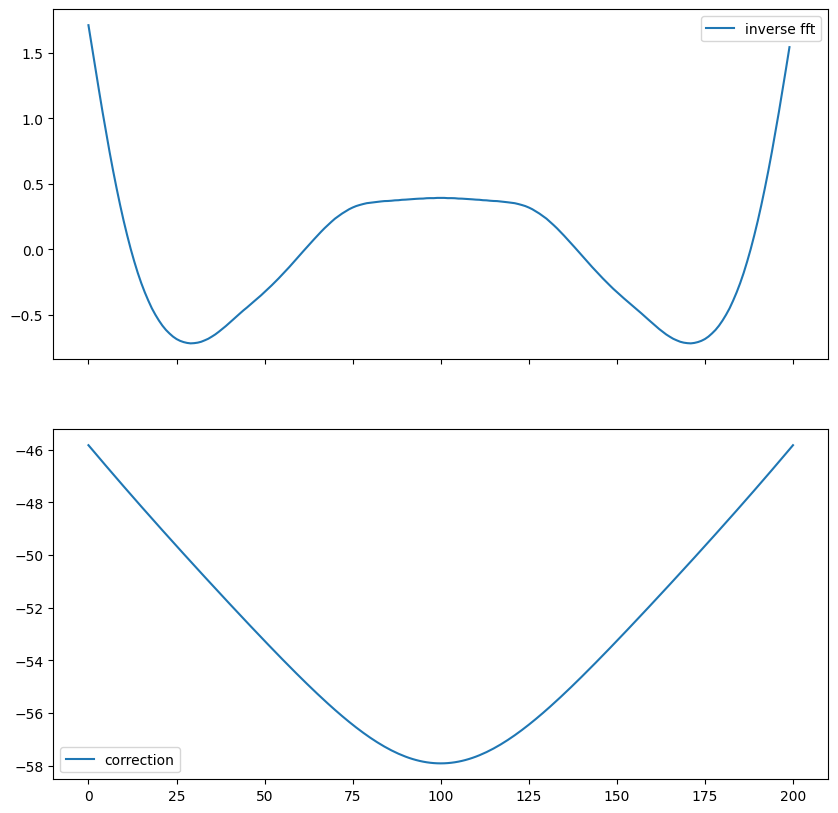

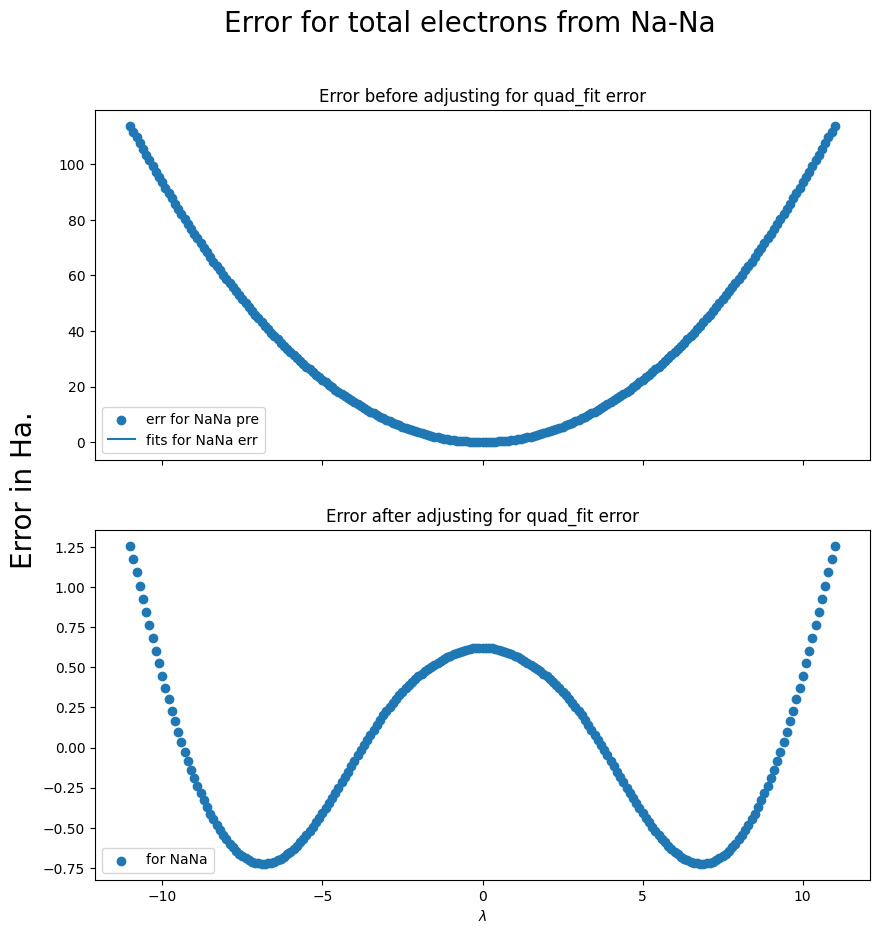

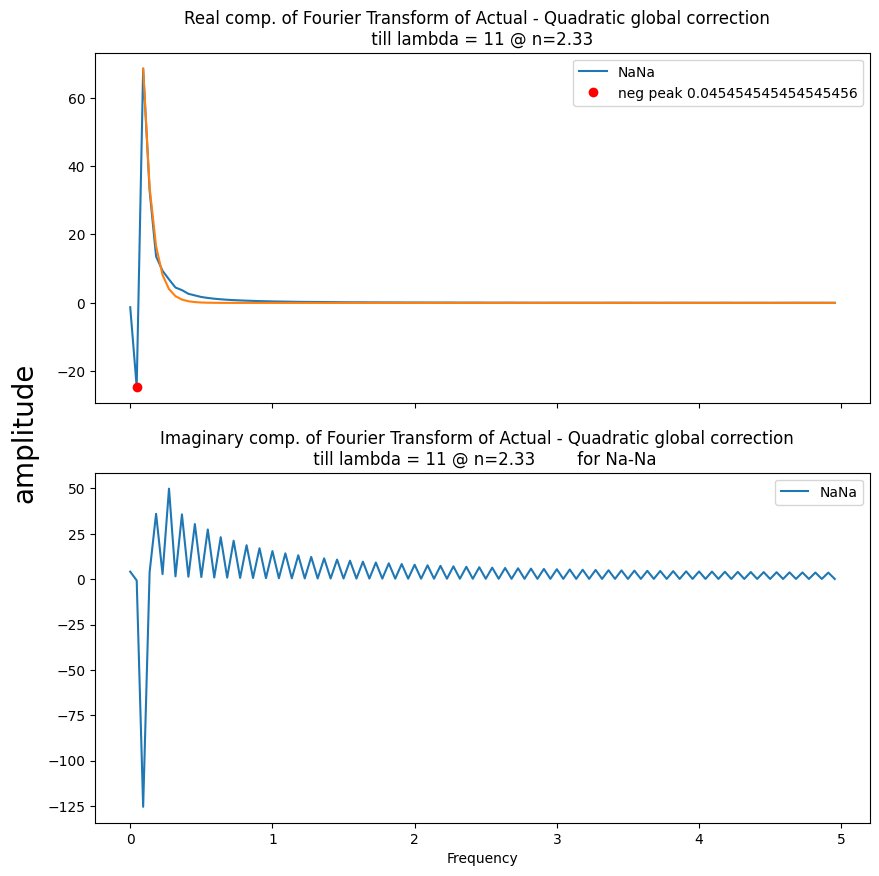

All good
68.46645603593409
False


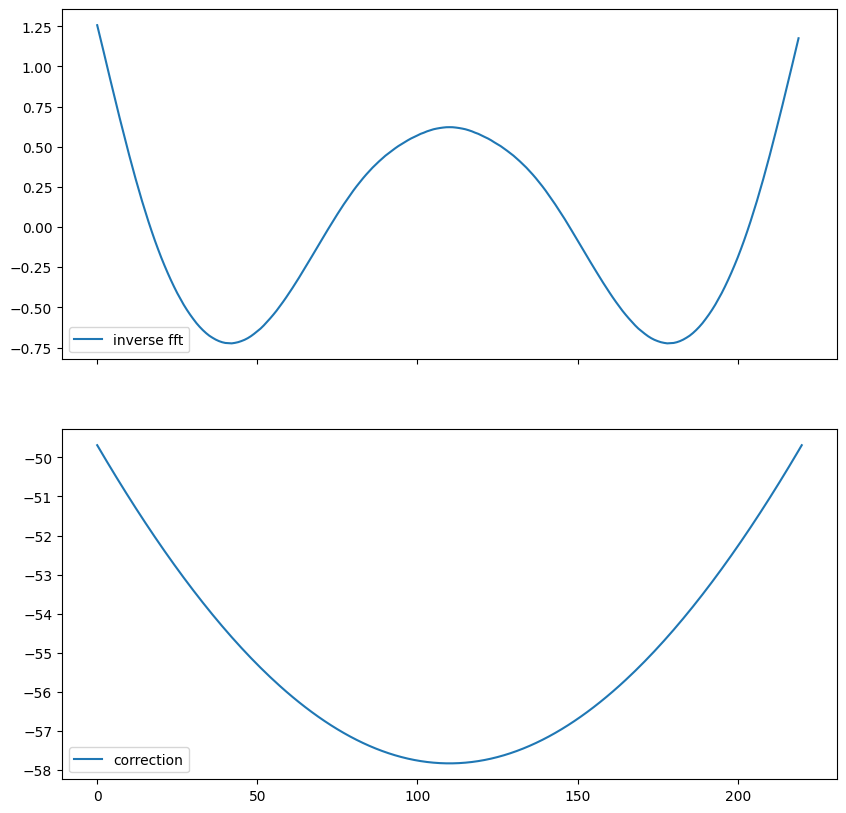

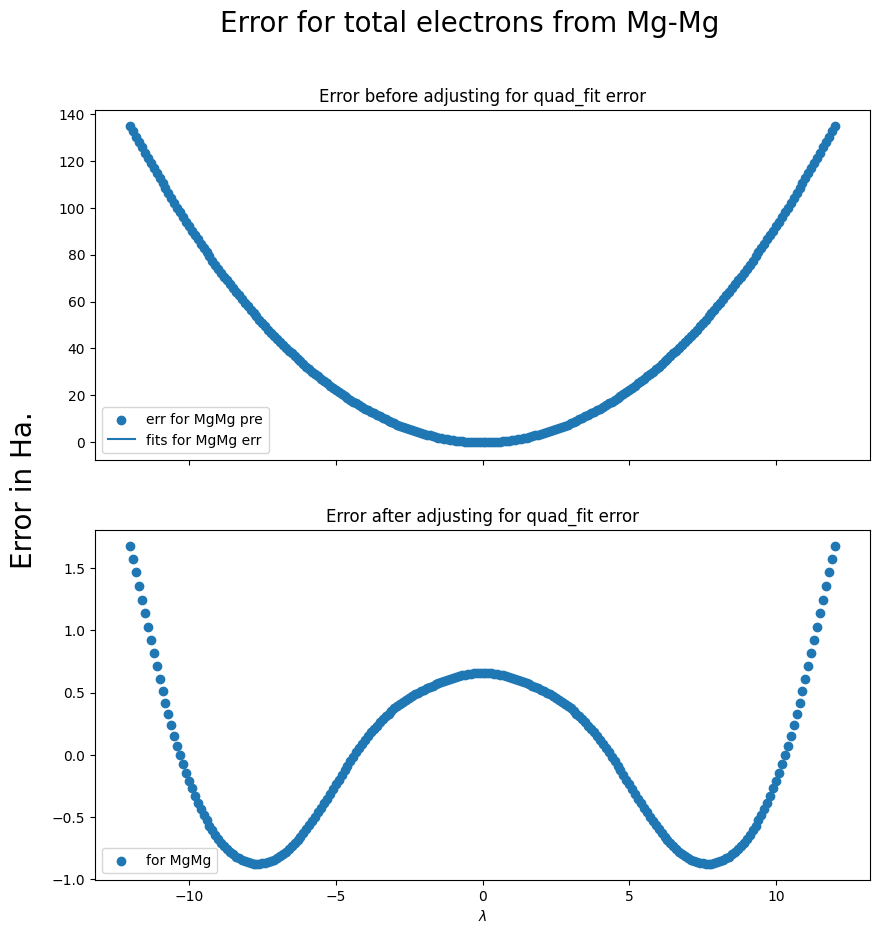

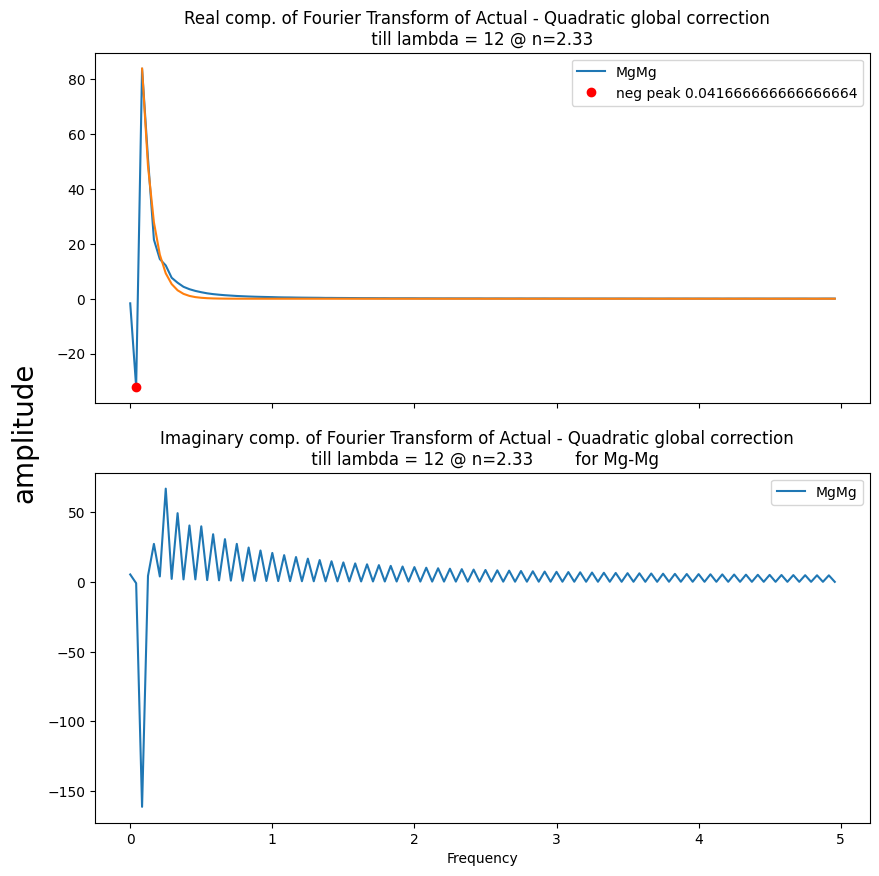

All good
83.88006538887893
False


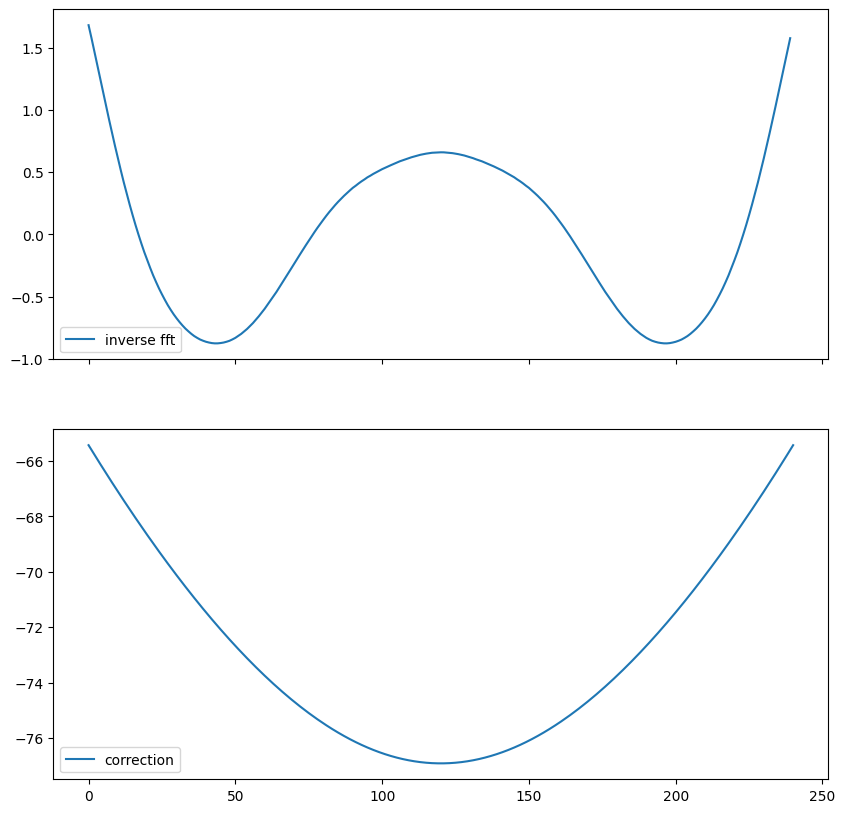

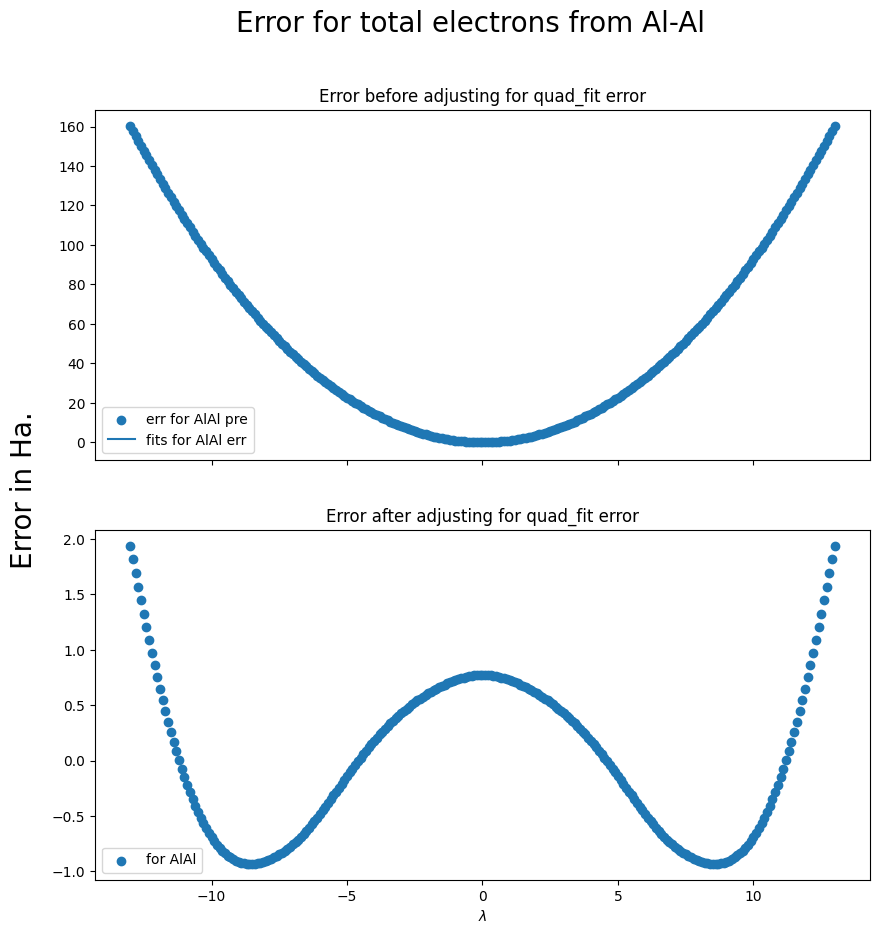

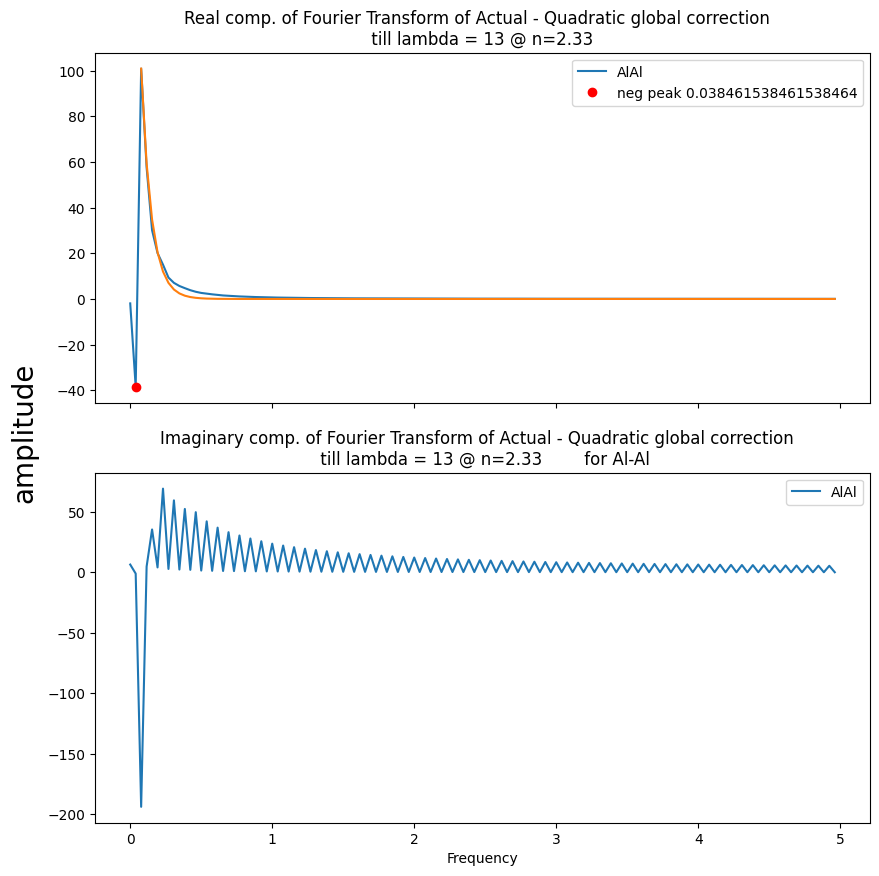

All good
100.88536255062712
False


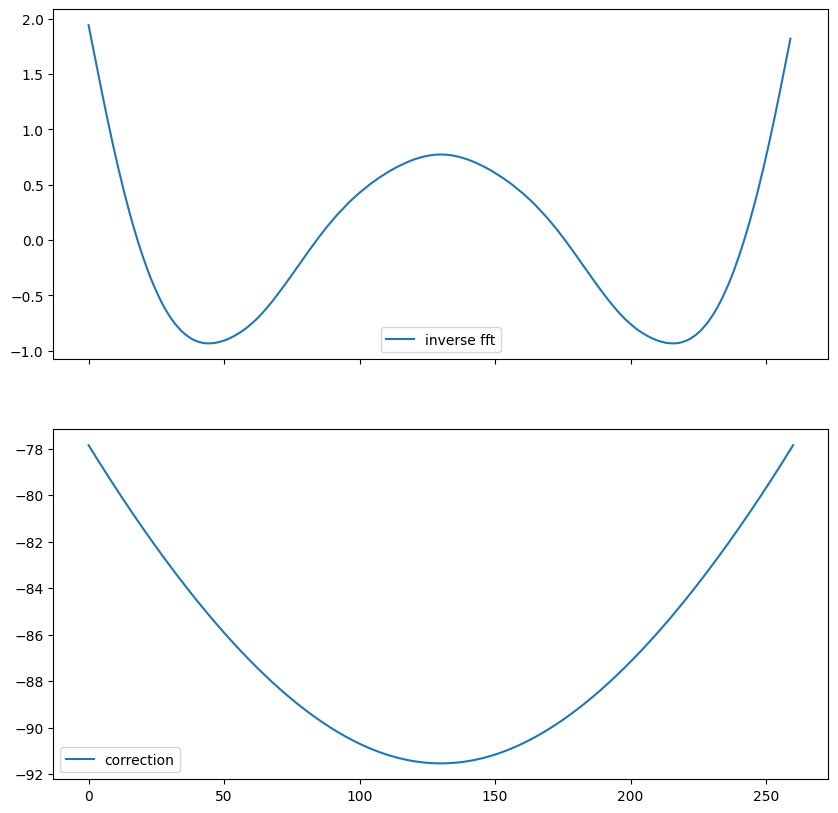

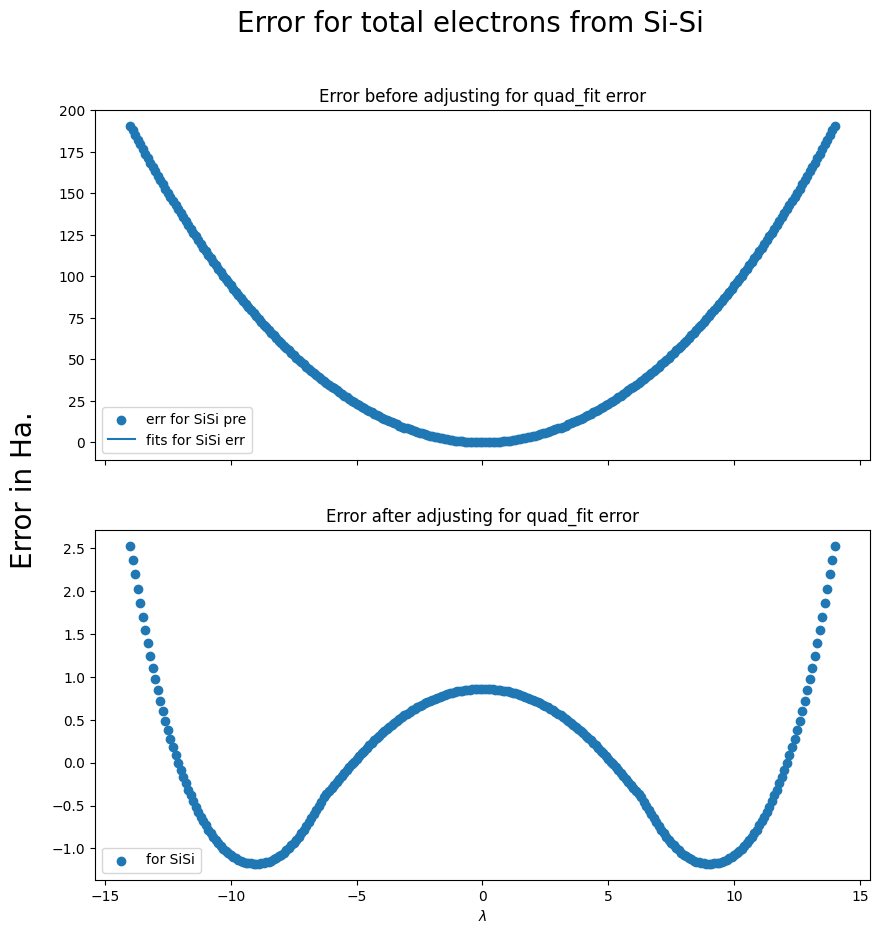

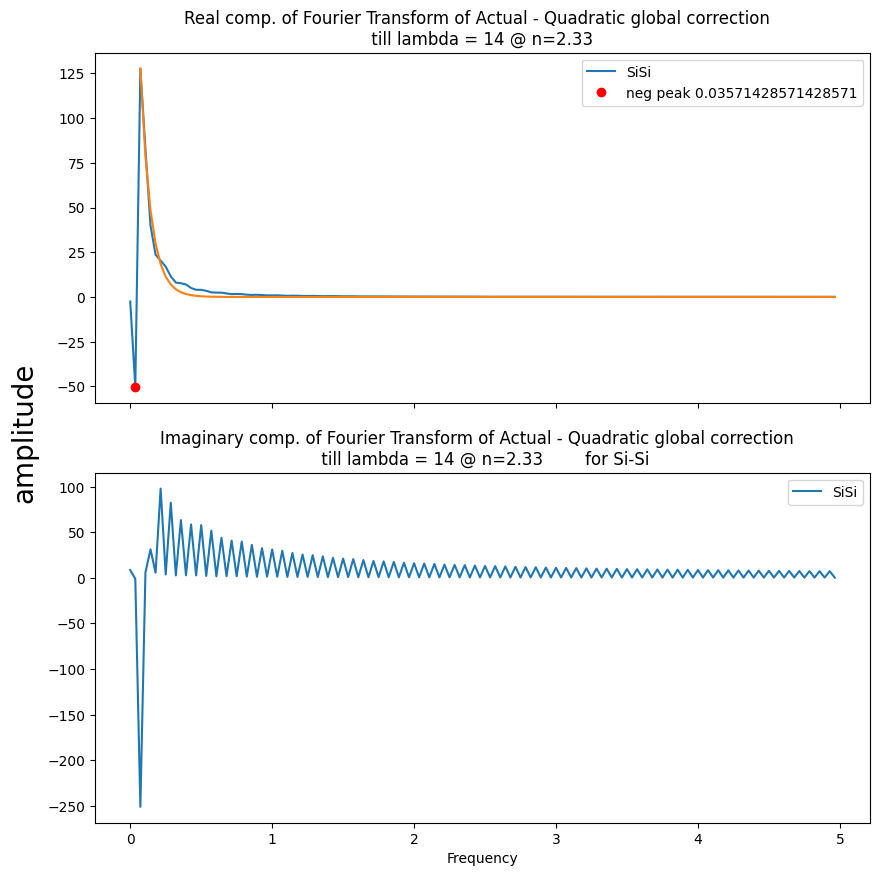

All good
127.70075685277568
True


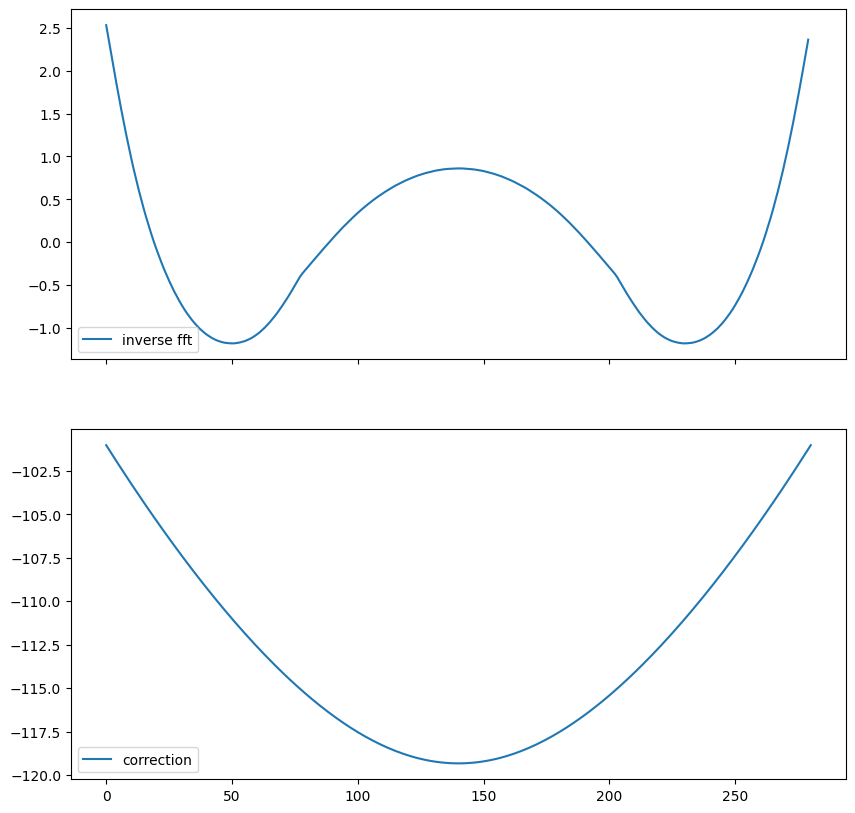

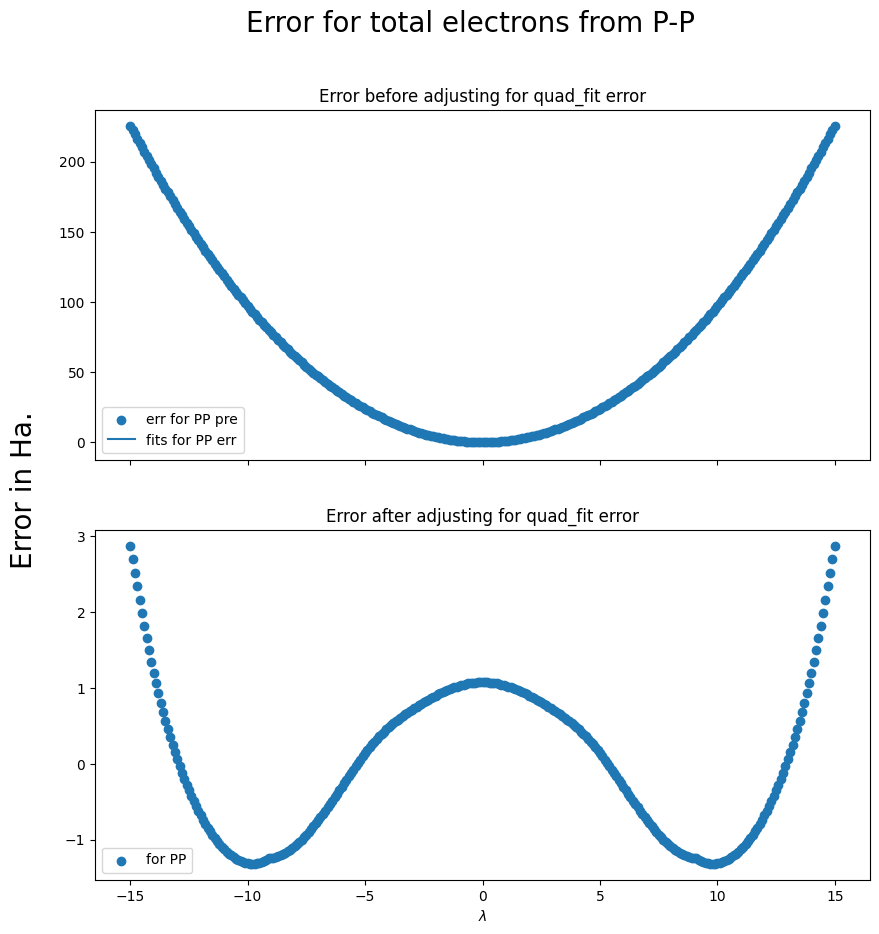

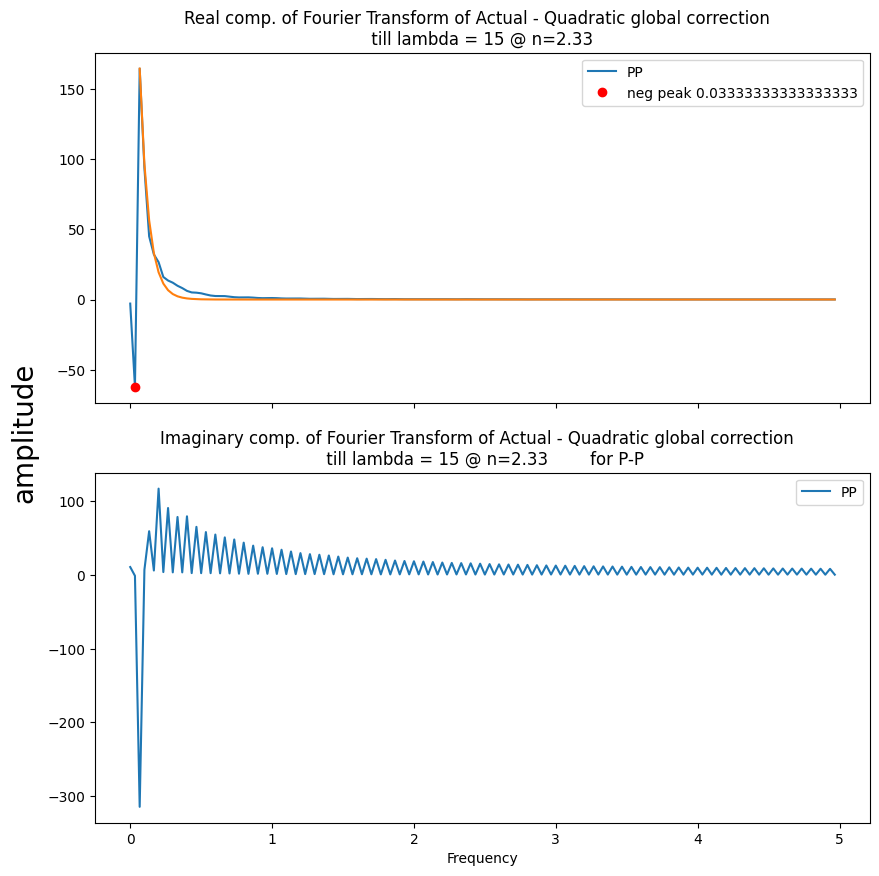

All good
164.37726580129322
False


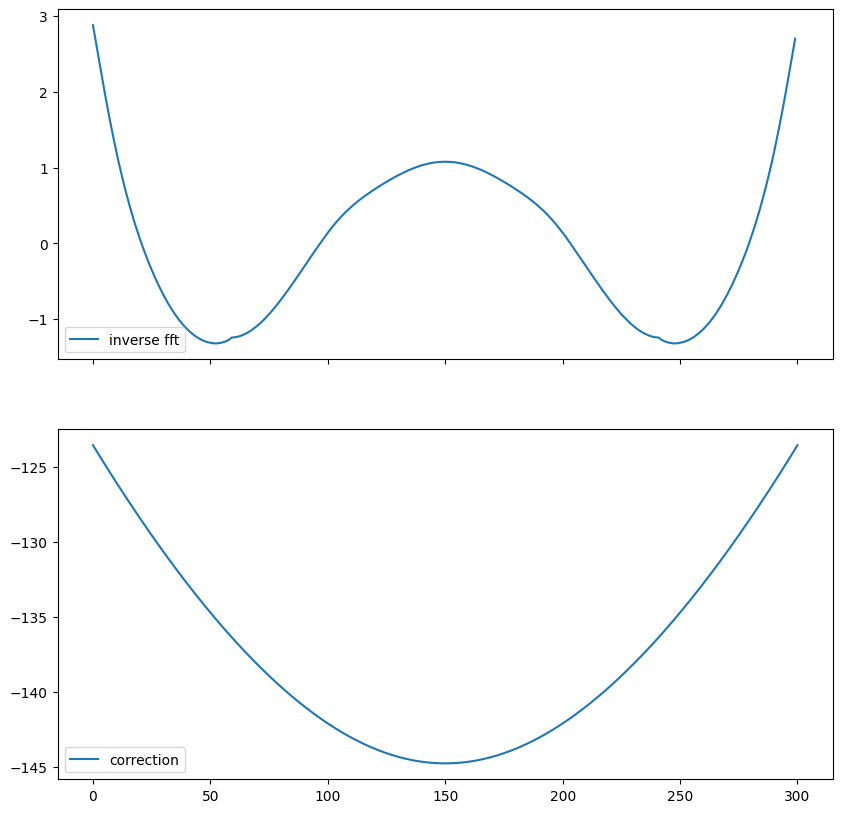

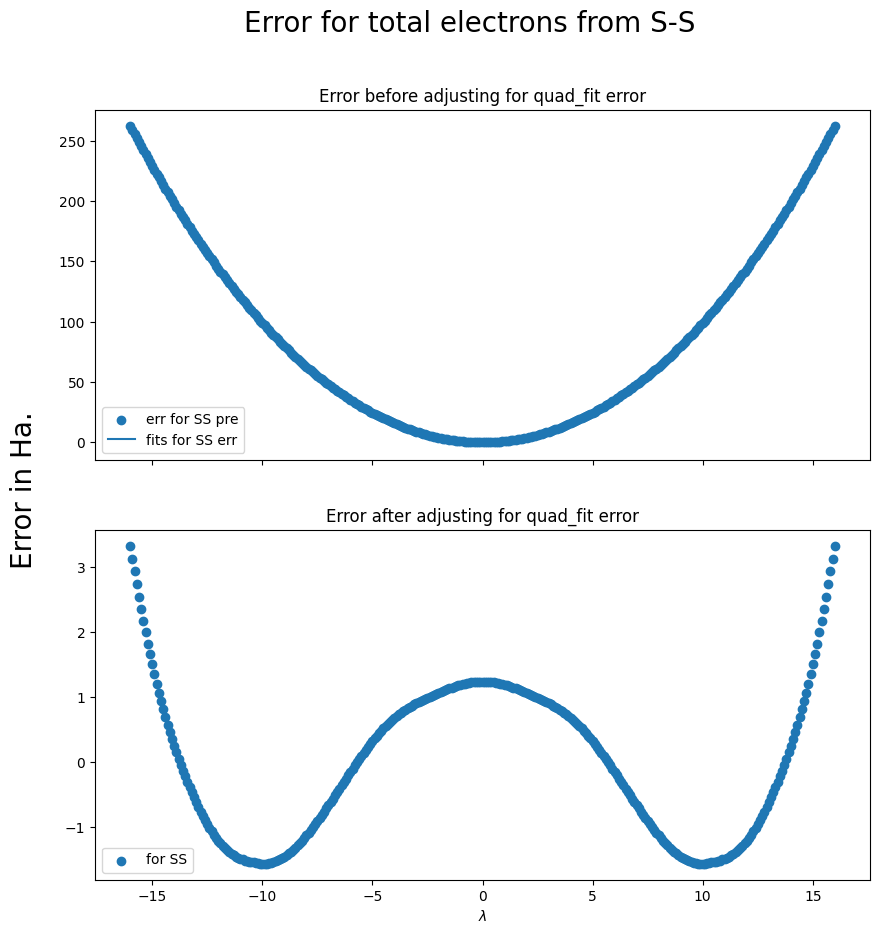

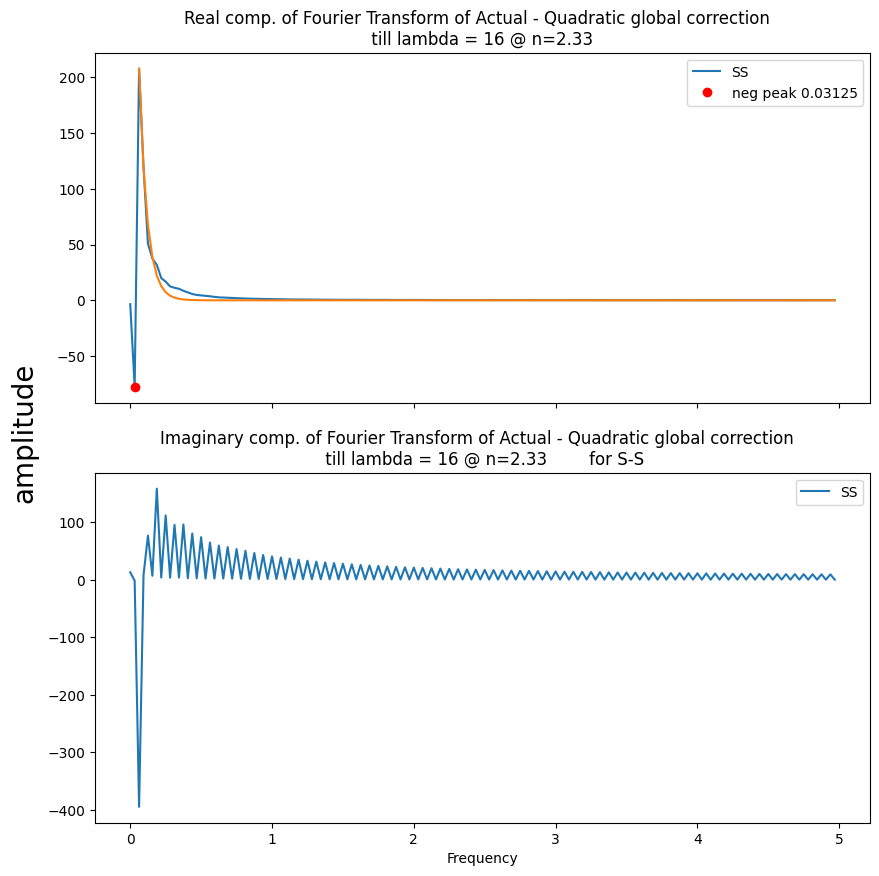

All good
207.60726235502173
False


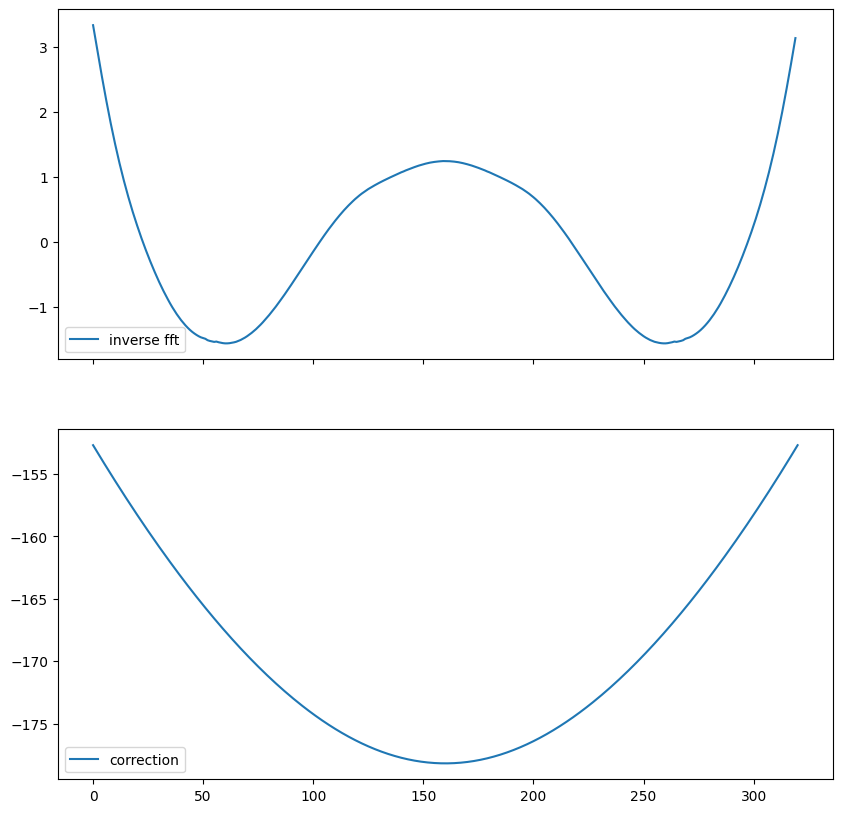

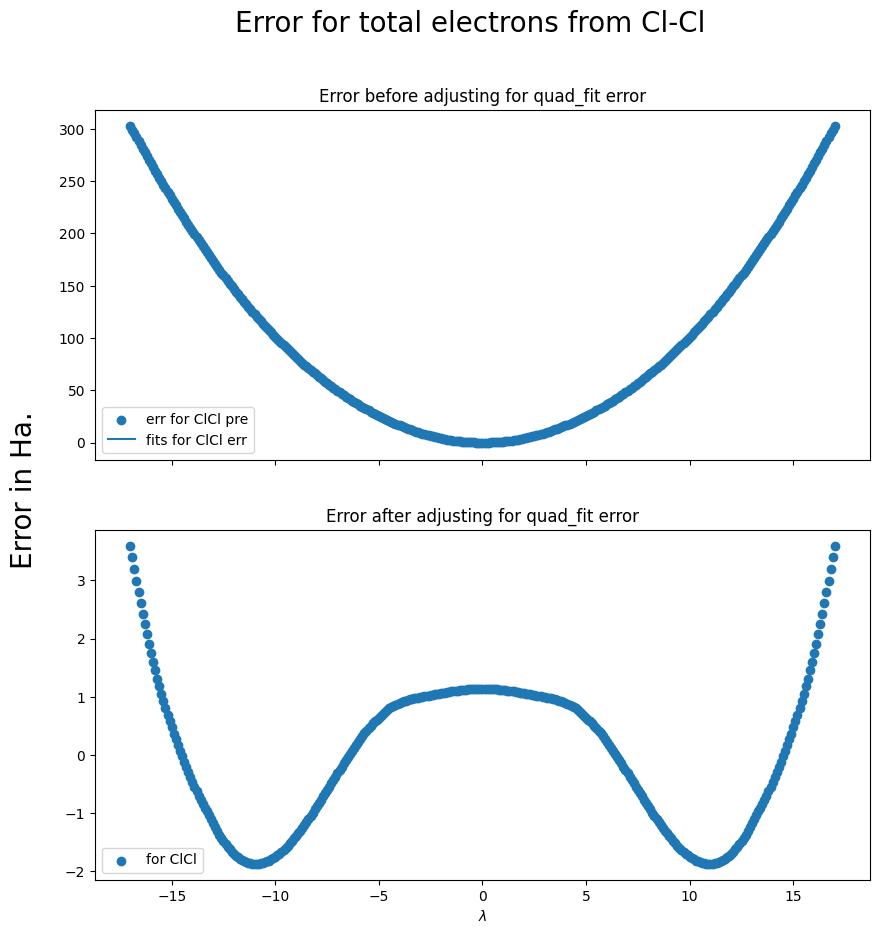

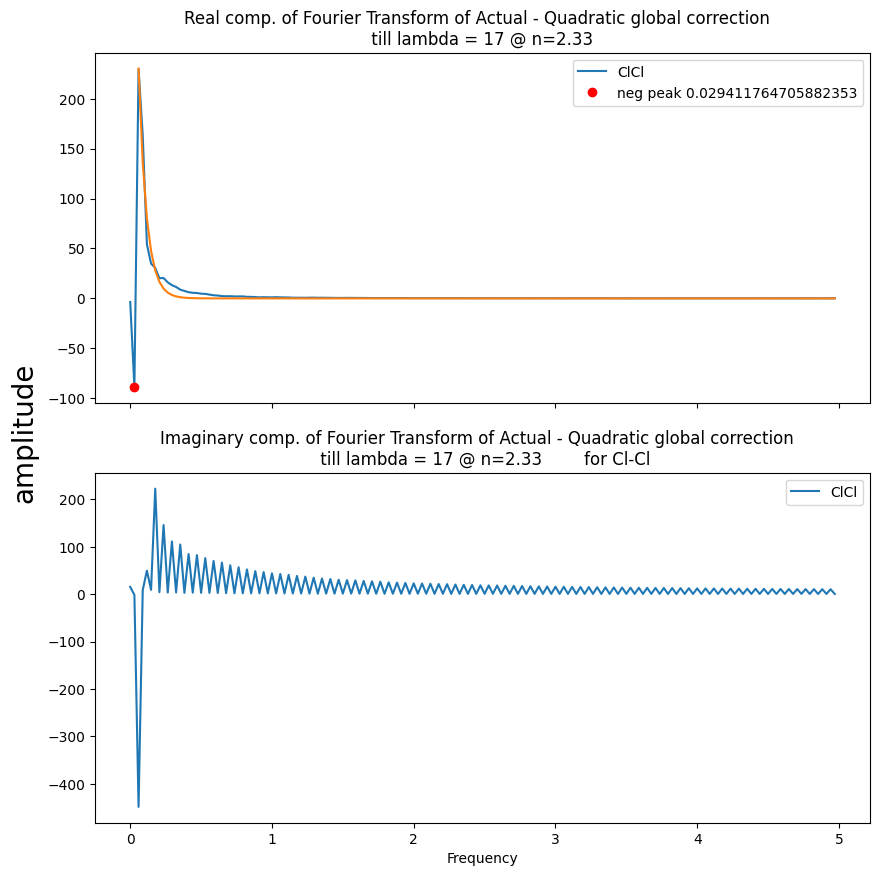

All good
229.75578573645197
False


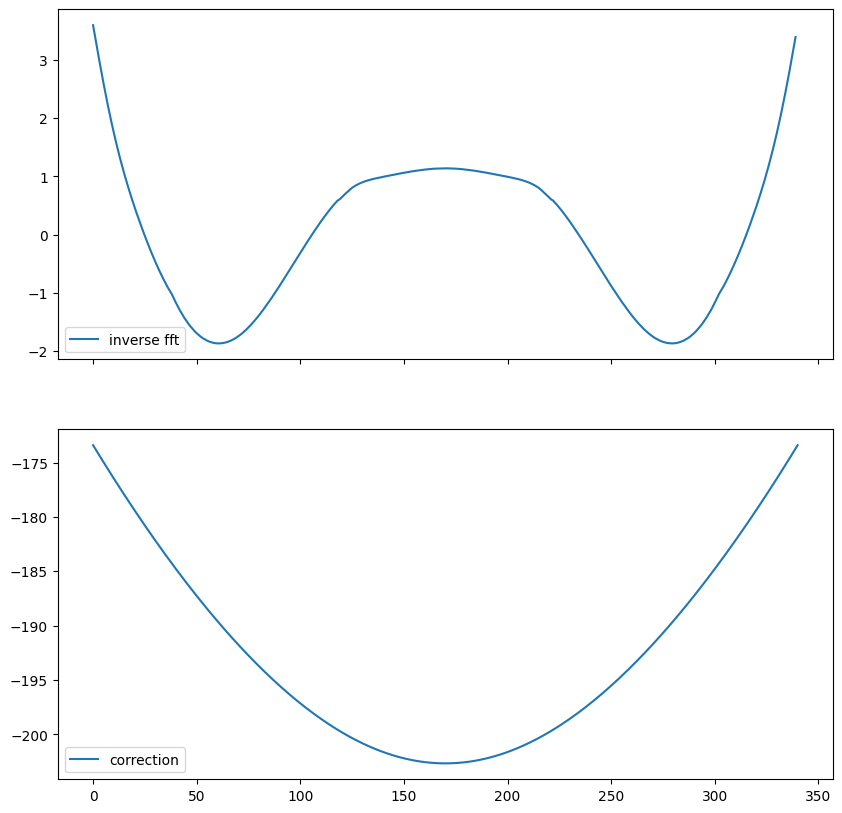

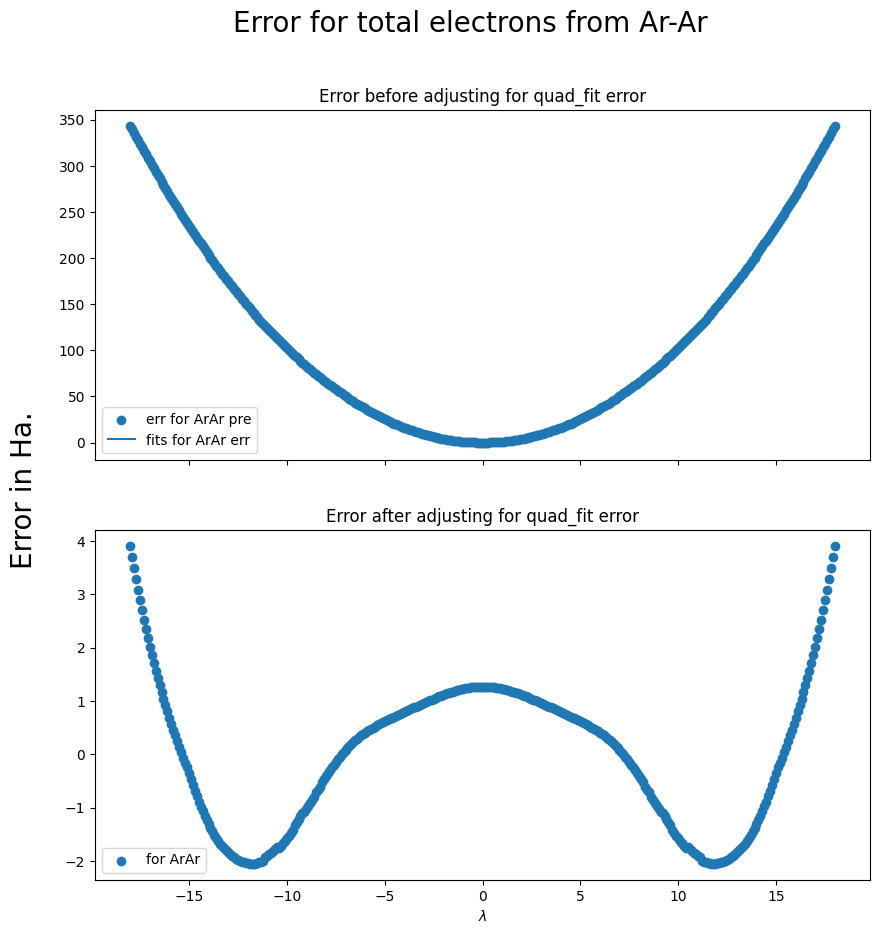

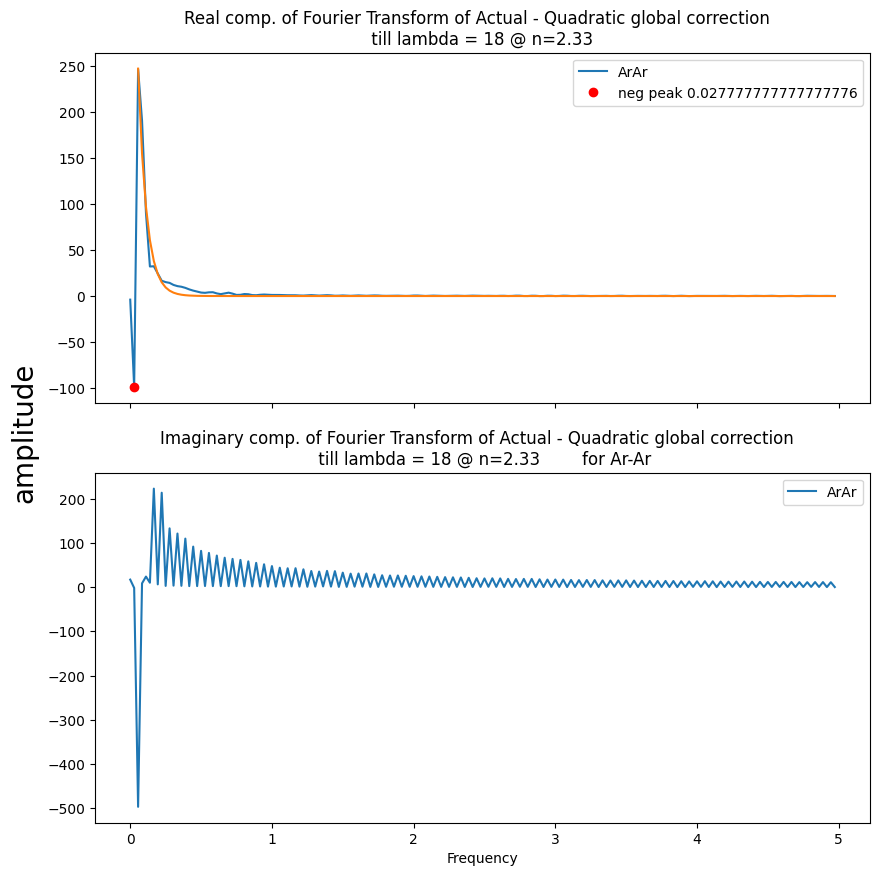

All good
247.34910061800943


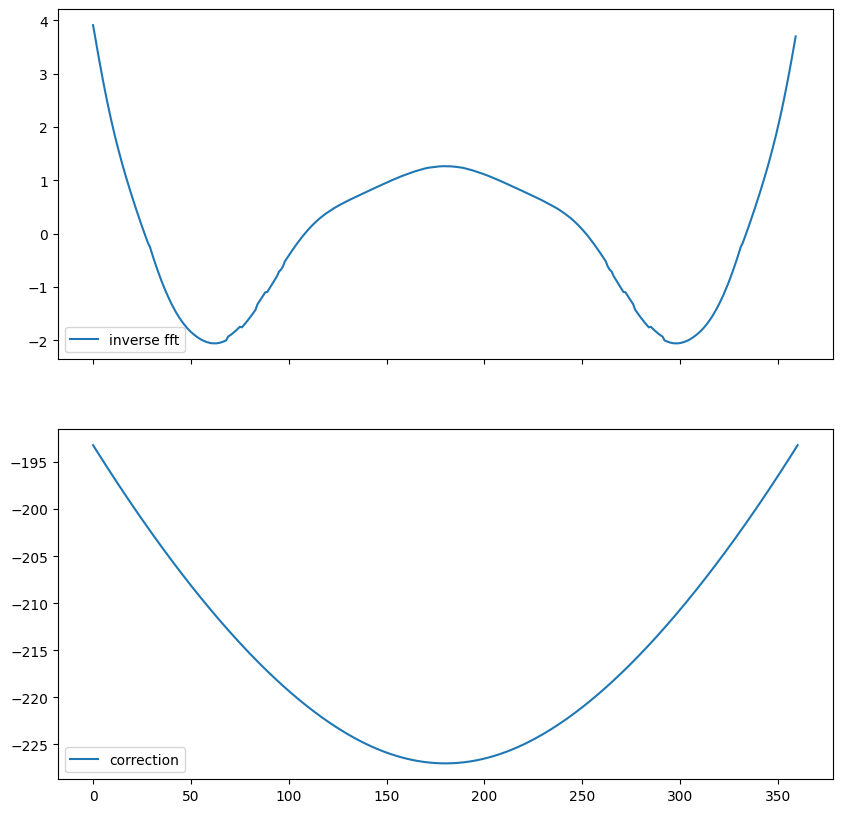

In [29]:
# num_processes = multiprocessing.cpu_count()  # Get the number of CPU cores
# inputs = range(5,19)  # Example input values

# with concurrent.futures.ProcessPoolExecutor(max_workers=num_processes) as executor:
#     results = executor.map(initiate, inputs)

for i in range(6,10):
    initiate(i)


# plt.plot(err)
# for i in range(int((len(err)+1)/2)):
#     print(err[int((len(err)-1)/2+i)]==err[int((len(err)-1)/2-i)])

#     freqs.append(imag_peak_freqs[0])
#     hts.append(imag_peak_heights[0])
# plt.plot(range(5,19),freqs)
# for i in range(5,19):
#     # show a saved figure
#     image_path = f"data/figs/n={main.exponent}; step={main.step}/{i}to{i}.png"
#     img = mpimg.imread(image_path)

#     # Display the image
#     plt.imshow(img)
#     plt.axis('off')  # Turn off the axis
#     plt.show()

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft, fftshift, ifftshift

def check_even(err):
    flipped_array = np.flip(err)
    return np.isclose(flipped_array, err).all()
    
def reflect(arr, neg=1):
    flipped_array = np.flip(arr[1:])
    even_array = np.append(flipped_array,arr)
    return even_array[:-1]